In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('project.csv')
df.columns, df.shape

(Index(['Unnamed: 0', 'summary', 'config', 'name'], dtype='object'), (1866, 4))

In [28]:
data_df = dict()
for i in range(len(df)):
    for k in eval(df.iloc[i].summary).keys():
        if k.split('/')[0] != 'gradients':
            data_df[k] = []

    for k in eval(df.iloc[i].config).keys():
        if k != 'lr':
            data_df[k] = []

data_df['arch'] = []
for k in df.name:
    data_df['arch'].append(k.split('_')[0])

for i in range(len(df)):
    for k, v in eval(df.iloc[i].summary).items():
        if k in data_df:
            data_df[k].append(v) 

    for k, v in eval(df.iloc[i].config).items():
        if k in data_df:
            data_df[k].append(v)
        if v == 'nan':
            data_df[k].append(np.nan)
        

    for k in data_df: #clean up missing values
        if len(data_df[k]) != i+1 and len(data_df[k]) != len(df):
            data_df[k].append(np.nan)


In [29]:
del data_df['lr']

In [30]:
for k in data_df.keys():
    print(k, len(data_df[k]))

14_step_MASE 1866
neighbors_overlap 1866
_step 1866
7_step_kl_div 1866
7_step_logMSE 1866
train_loss 1866
1_step_MAE 1866
E^2_3 1866
7_step_MASE 1866
14_step_Correl 1866
14_step_MSE 1866
MASE 1866
mlp_predict_attractor_train_score 1866
7_step_Correl 1866
1_step_logMSE 1866
noise_amplification 1866
_runtime 1866
1_step_kl_div 1866
1_step_AIC 1866
Correl 1866
1_step_spectral_corr 1866
neighbors_correlation 1866
R2 1866
MSE 1866
lm_predict_attractor_train_score 1866
val_loss 1866
logMSE 1866
eps^2_3 1866
7_step_R2 1866
AIC 1866
7_step_AIC 1866
1_step_R2 1866
_timestamp 1866
7_step_MAE 1866
14_step_logMSE 1866
14_step_kl_div 1866
mlp_predict_attractor_test_score 1866
14_step_R2 1866
14_step_AIC 1866
1_step_MASE 1866
7_step_spectral_corr 1866
14_step_MAE 1866
14_step_spectral_corr 1866
7_step_MSE 1866
1_step_MSE 1866
1_step_Correl 1866
lm_predict_attractor_test_score 1866
MAE 1866
dt 1866
loss 1866
name 1866
seed 1866
temp 1866
time 1866
epochs 1866
n_head 1866
nsteps 1866
use_pe 1866
d_mod

In [31]:
ddf = pd.DataFrame(data_df)
ddf

,14_step_MASE,neighbors_overlap,_step,7_step_kl_div,7_step_logMSE,train_loss,1_step_MAE,E^2_3,7_step_MASE,14_step_Correl,...,observed_noise,_wandb,rmax,rmin,siso,d_state,dropout,activation,architecture,arch
0,18.748386,0.065291,62.0,13.309856,4.131748,0.925588,6.894334,3.304171,18.734449,-0.007092,...,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT
1,18.286142,0.209489,88.0,15.224266,4.107563,0.158117,5.781574,1.046329,18.151352,0.795275,...,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT
2,22.058540,0.260140,102.0,15.273683,4.161314,0.140164,6.133471,0.992702,22.071140,0.832212,...,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT
3,23.690542,0.251483,127.0,15.367496,4.207396,0.165527,6.321203,0.910346,23.834326,0.030915,...,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT
4,7.495056,0.266904,540.0,0.027563,1.108510,0.068444,0.206773,0.401571,3.883788,0.906882,...,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,8.226464,0.286824,868.0,0.031532,1.248686,0.096028,0.246072,0.408220,4.375056,0.902405,...,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT
1862,9.452845,0.255130,399.0,0.025952,1.513896,0.079315,0.252725,0.809445,4.979389,0.856940,...,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT
1863,9.747126,0.076603,449.0,0.025144,1.288877,0.100136,0.227843,3.519023,4.867569,0.888414,...,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT
1864,10.103682,0.067956,449.0,0.028456,1.447565,0.093316,0.246805,4.767823,5.141068,0.870935,...,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPT


(array([  69.,   99.,   39.,   72.,    6.,   39.,   40.,   20.,    6.,
        1472.]),
 array([   2. ,  136.7,  271.4,  406.1,  540.8,  675.5,  810.2,  944.9,
        1079.6, 1214.3, 1349. ]),
 <BarContainer object of 10 artists>)

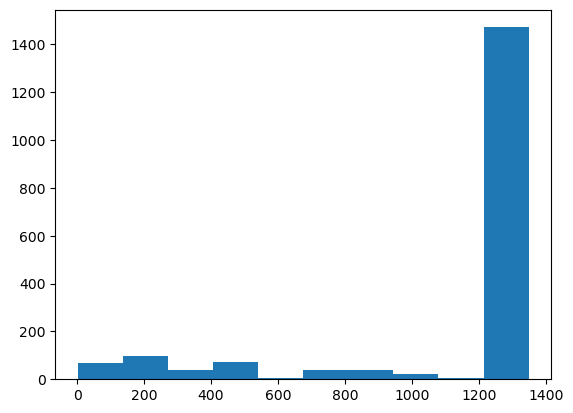

In [32]:
plt.hist(ddf['_step'])

In [33]:
#filter out models with MASE > 1
ddf = ddf[ddf['MASE'] <= 1]
ddf = ddf[ddf['_step']>=1000]
ddf = ddf[ddf['arch'] != 'RNN']
ddf = ddf[ddf['d_model'] != 20]
# ddf = ddf[np.logical_or(ddf['d_state'].isnull(), ddf['d_state']<= ddf['d_model'])]

([<matplotlib.axis.XTick at 0x187d7b260>,
 [Text(10, 0, '10'),
  Text(25, 0, '25'),
  Text(50, 0, '50'),
  Text(100, 0, '100')])

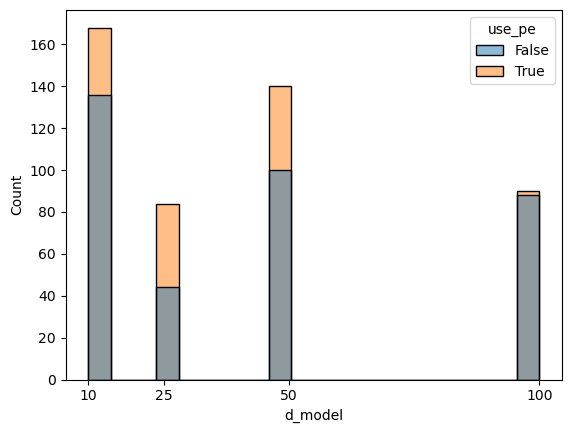

In [41]:
sns.histplot(data=ddf,x='d_model',hue='use_pe',stat='count',common_norm=False,bins=20)
plt.xticks([10,25,50,100])

<Axes: xlabel='arch', ylabel='MASE'>

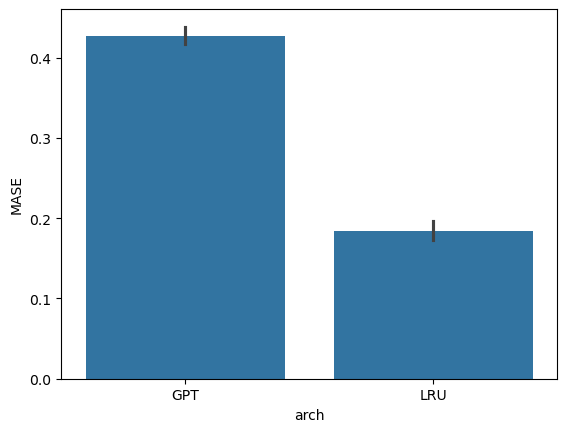

In [11]:
sns.barplot(x='arch', y='MASE', data=ddf)

<Axes: xlabel='arch', ylabel='noise_amplification'>

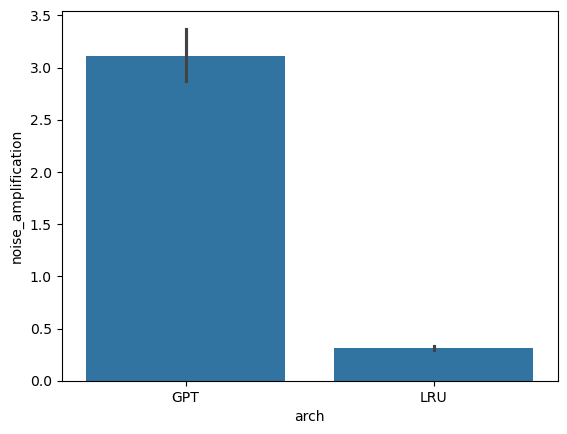

In [12]:
sns.barplot(x='arch', y='noise_amplification', data=ddf)

In [13]:
ddf.keys()

Index(['14_step_MASE', 'neighbors_overlap', '_step', '7_step_kl_div',
       '7_step_logMSE', 'train_loss', '1_step_MAE', 'E^2_3', '7_step_MASE',
       '14_step_Correl', '14_step_MSE', 'MASE',
       'mlp_predict_attractor_train_score', '7_step_Correl', '1_step_logMSE',
       'noise_amplification', '_runtime', '1_step_kl_div', '1_step_AIC',
       'Correl', '1_step_spectral_corr', 'neighbors_correlation', 'R2', 'MSE',
       'lm_predict_attractor_train_score', 'val_loss', 'logMSE', 'eps^2_3',
       '7_step_R2', 'AIC', '7_step_AIC', '1_step_R2', '_timestamp',
       '7_step_MAE', '14_step_logMSE', '14_step_kl_div',
       'mlp_predict_attractor_test_score', '14_step_R2', '14_step_AIC',
       '1_step_MASE', '7_step_spectral_corr', '14_step_MAE',
       '14_step_spectral_corr', '7_step_MSE', '1_step_MSE', '1_step_Correl',
       'lm_predict_attractor_test_score', 'MAE', 'dt', 'loss', 'name', 'seed',
       'temp', 'time', 'epochs', 'n_head', 'nsteps', 'use_pe', 'd_model',
       'nsam

In [14]:
ddf['noise_amp_unnormalized'] = ddf['E^2_3'] / ddf['eps^2_3']
ddf['noise_amp_unnormalized']

14      0.119561
15      0.158787
16      0.133009
17      0.128621
18      0.152456
          ...   
1838    0.482022
1839    0.101885
1840    0.051924
1841    0.034460
1843    0.446840
Name: noise_amp_unnormalized, Length: 1103, dtype: float64

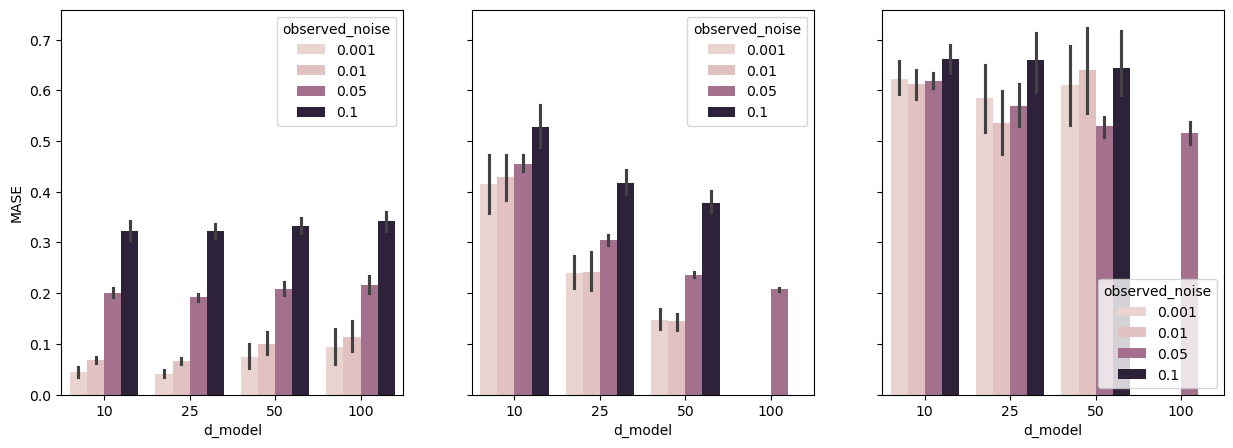

In [15]:
gpt_pe_ddf = ddf[np.logical_and(ddf['arch'] == 'GPT',ddf['use_pe'] == True)]
gpt_nope_ddf = ddf[np.logical_and(ddf['arch'] == 'GPT',ddf['use_pe'] == False)]
gpt_ddf = ddf[ddf['arch'] == 'GPT']
lru_ddf = ddf[ddf['arch'] == 'LRU']

fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
for i,name in enumerate(['LRU','GPT PE', 'GPT no PE']):
    if name == 'LRU':
        d = ddf[ddf['arch'] == 'LRU']
    elif name == 'GPT no PE':
        d = ddf[np.logical_and(ddf['arch'] == 'GPT',ddf['use_pe'] == False)]
    elif name == 'GPT PE':
        d = ddf[np.logical_and(ddf['arch'] == 'GPT',ddf['use_pe'] == True)]

    sns.barplot(x='d_model',y='MASE',data=d,hue='observed_noise',ax=ax[i])
    # ax[i].set_yscale('log')

In [16]:
noise = 0.05
ddf = ddf[ddf['observed_noise'] == noise]
ddf.shape

(795, 84)

In [17]:
nddf = ddf[ddf['d_model'] != 20]

In [18]:
gpt_pe_ddf = nddf[np.logical_and(nddf['arch'] == 'GPT',nddf['use_pe'] == True)]
gpt_nope_ddf = nddf[np.logical_and(nddf['arch'] == 'GPT',nddf['use_pe'] == False)]
gpt_ddf = nddf[nddf['arch'] == 'GPT']
lru_ddf = nddf[nddf['arch'] == 'LRU']

In [19]:
ddf.keys()

Index(['14_step_MASE', 'neighbors_overlap', '_step', '7_step_kl_div',
       '7_step_logMSE', 'train_loss', '1_step_MAE', 'E^2_3', '7_step_MASE',
       '14_step_Correl', '14_step_MSE', 'MASE',
       'mlp_predict_attractor_train_score', '7_step_Correl', '1_step_logMSE',
       'noise_amplification', '_runtime', '1_step_kl_div', '1_step_AIC',
       'Correl', '1_step_spectral_corr', 'neighbors_correlation', 'R2', 'MSE',
       'lm_predict_attractor_train_score', 'val_loss', 'logMSE', 'eps^2_3',
       '7_step_R2', 'AIC', '7_step_AIC', '1_step_R2', '_timestamp',
       '7_step_MAE', '14_step_logMSE', '14_step_kl_div',
       'mlp_predict_attractor_test_score', '14_step_R2', '14_step_AIC',
       '1_step_MASE', '7_step_spectral_corr', '14_step_MAE',
       '14_step_spectral_corr', '7_step_MSE', '1_step_MSE', '1_step_Correl',
       'lm_predict_attractor_test_score', 'MAE', 'dt', 'loss', 'name', 'seed',
       'temp', 'time', 'epochs', 'n_head', 'nsteps', 'use_pe', 'd_model',
       'nsam

<Axes: xlabel='d_model', ylabel='MASE'>

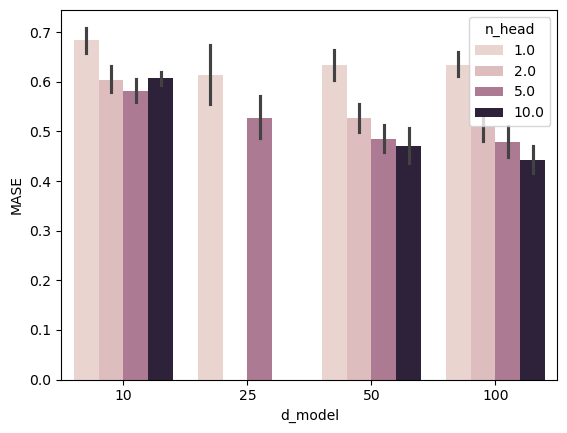

In [20]:
sns.barplot(x='d_model',y='MASE',data=gpt_nope_ddf,hue='n_head')

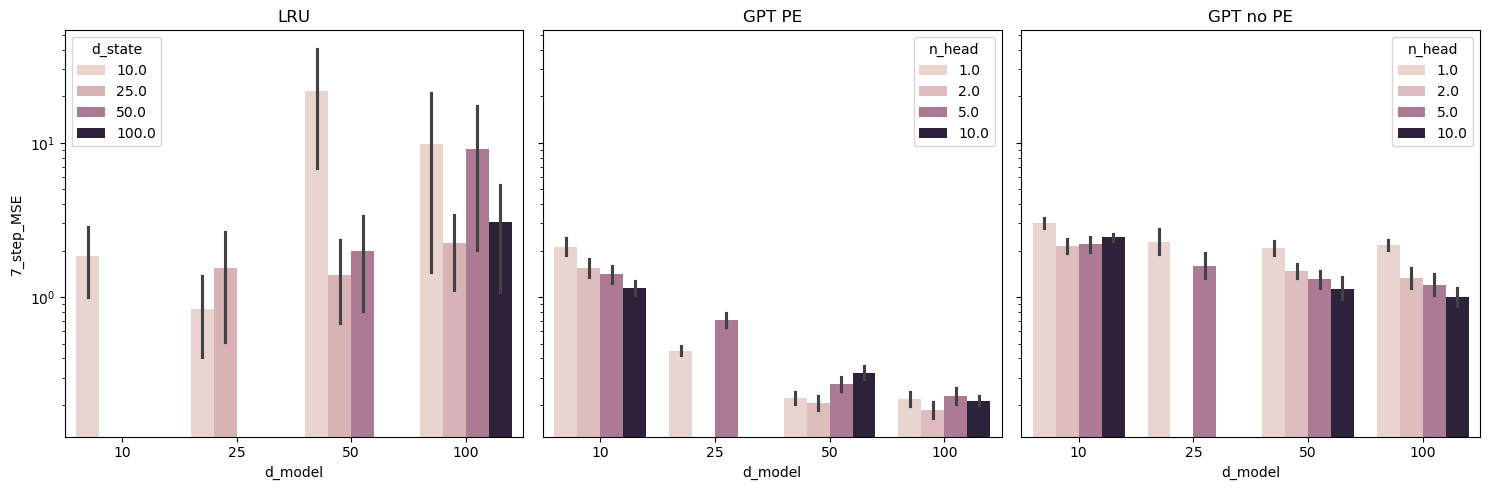

In [21]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
y = '7_step_MSE'
x = 'd_model'
for i,(d,name) in enumerate(zip([lru_ddf,gpt_pe_ddf,gpt_nope_ddf],['LRU','GPT PE', 'GPT no PE'])):
    # sns.barplot(x='d_model',y='E^2_3',data=d,hue='mlp_hidden',ax=ax[i])
    if name == 'LRU':
        sns.barplot(x=x,y=y,data=d,hue='d_state',ax=ax[i])
    else:
        sns.barplot(x=x, y=y,data=d,hue='n_head',ax=ax[i])
    ax[i].set_title(name)
    # ax[i].set_ylim(0,0.8)
    ax[i].set_yscale('log')
plt.tight_layout()

In [22]:
nnddf = pd.concat([gpt_nope_ddf,lru_ddf])
nnddf.shape

(405, 84)

In [23]:
nnddf['arch_dim'] = nnddf['arch'] + nnddf['d_model'].astype(str)

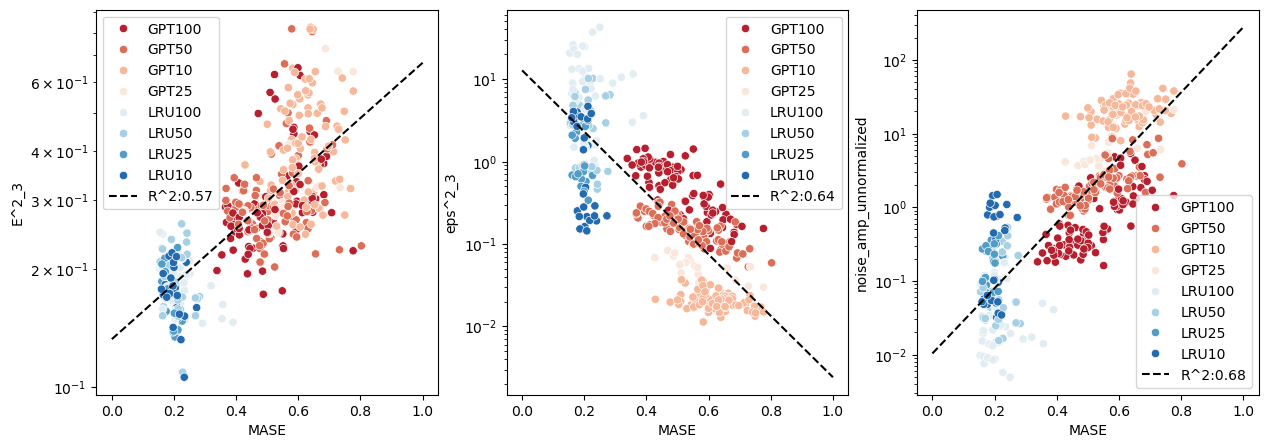

In [24]:
hue = 'arch_dim'
df_used = nnddf
palette = 'RdBu'
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x='MASE', y='E^2_3', data=df_used,hue=hue, ax=ax[0],palette=palette)
ax[0].set_yscale('log')
#add regression line to above plot

from sklearn.linear_model import LinearRegression
def log_linreg(x,y):
    lr = LinearRegression()
    lr.fit(x,np.log(y))
    xhat = np.linspace(0,1,100).reshape(-1,1)
    yhat = np.exp(lr.predict(xhat))
    return xhat,yhat, round(lr.score(x,np.log(y)),2)


x,y,r2 = log_linreg(df_used['MASE'].values.reshape(-1,1), df_used['E^2_3'])
ax[0].plot(x,y,c='k',ls='--',label=f"R^2:{r2}") 
ax[0].legend()


sns.scatterplot(x='MASE', y='eps^2_3', data=df_used,hue=hue, ax=ax[1],palette=palette)
ax[1].set_yscale('log')

x,y,r2 = log_linreg(df_used['MASE'].values.reshape(-1,1), df_used['eps^2_3'])
ax[1].plot(x,y,c='k',ls='--',label=f"R^2:{r2}") 
ax[1].legend()


sns.scatterplot(x='MASE', y='noise_amp_unnormalized', data=df_used,hue=hue, ax=ax[2],palette=palette)
ax[2].set_yscale('log')
x,y,r2 = log_linreg(df_used['MASE'].values.reshape(-1,1), df_used['noise_amp_unnormalized'])
ax[2].plot(x,y,c='k',ls='--',label=f"R^2:{r2}") 
ax[2].legend()


<Axes: xlabel='d_model', ylabel='E^2_3'>

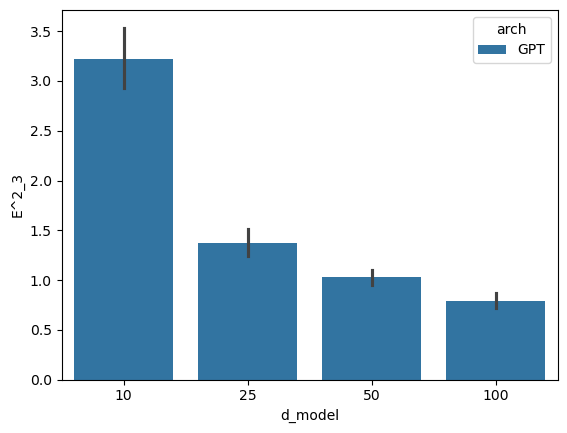

In [394]:
sns.barplot(x='d_model', y='E^2_3', data=gpt_ddf,hue='arch')
# plt.yscale('log')


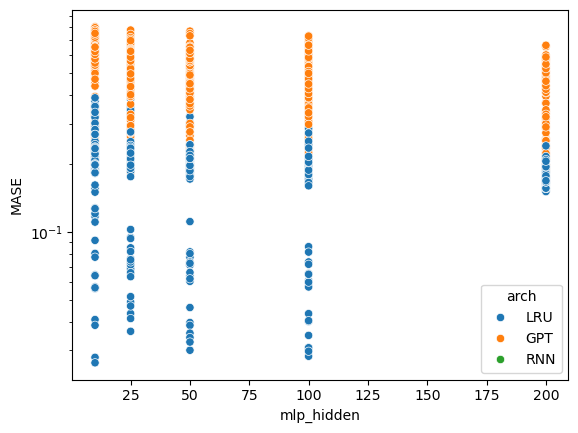

In [176]:
sns.scatterplot(x='mlp_hidden', y='MASE', data=ddf,hue='arch')
plt.yscale('log')